In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [4 9 0 1 6 0 7 1 3 2]


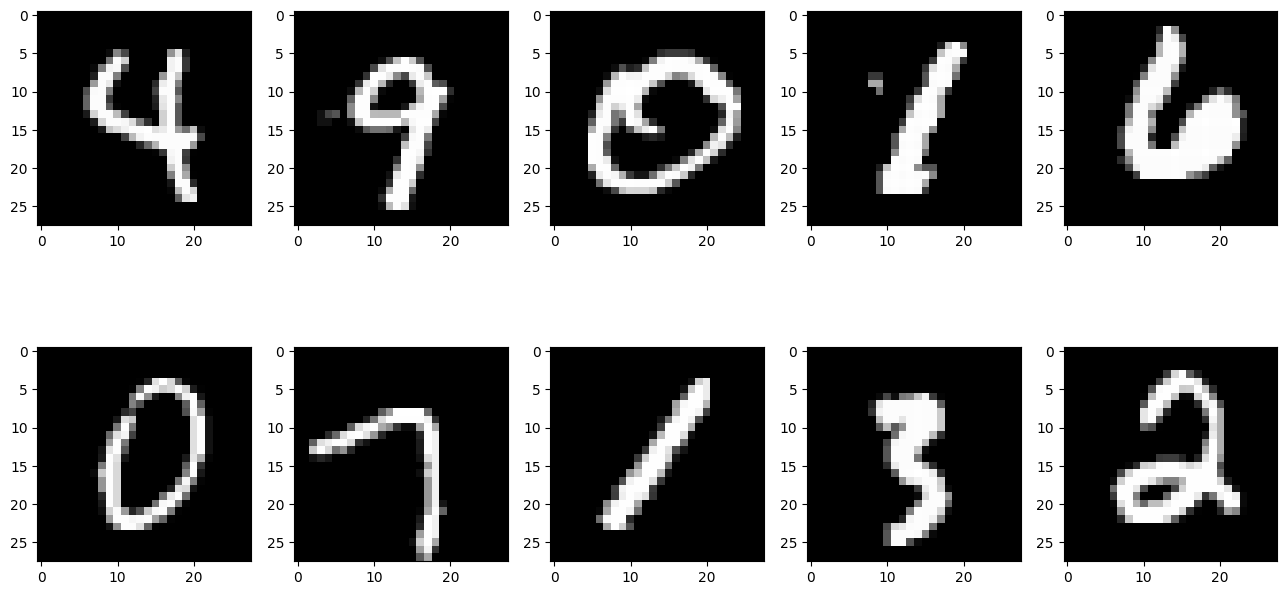

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [13]:
train_info = model.fit(new_train_data , new_train_target , epochs = 30) #epochs increased from 10

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9917 - loss: 0.0250
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9935 - loss: 0.0209
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0220
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9923 - loss: 0.0234
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9941 - loss: 0.0170
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9948 - loss: 0.0161
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.0211
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9960 - loss: 0.0122
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9951 - loss: 0.0161
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9956 - loss: 0.0136
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0113
Epoch 12/30
1875/1875 ━━━━━━━━

Plot the loss and accuracy graphs

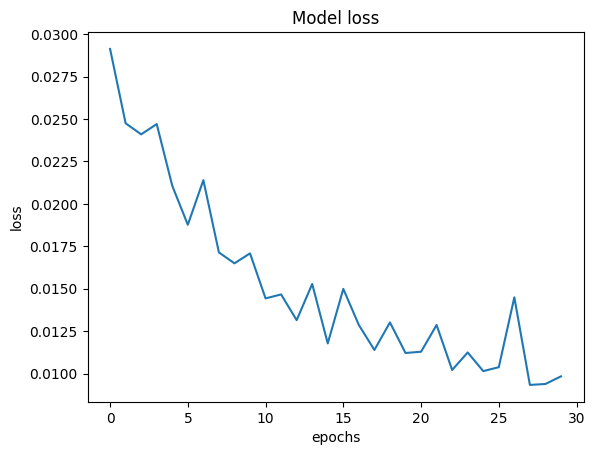

In [14]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

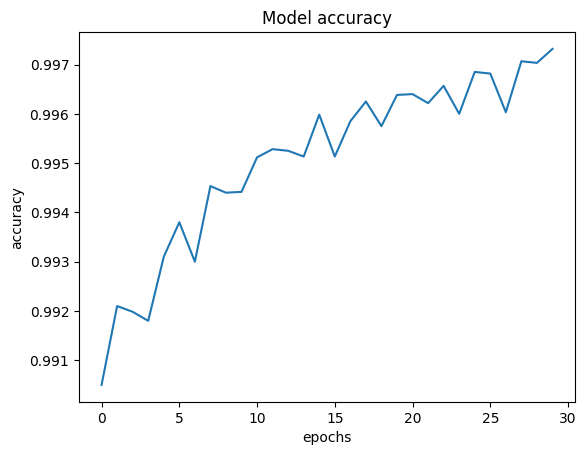

In [15]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [16]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9681 - loss: 0.2165
Loss of the Test dataset is: 0.18634292483329773
Accuracy of the test dataset is: 0.973800003528595


Save the model weights

In [12]:
#model.save_weights('MNIST_WEIGHTS_V1.h5') This is errorneous
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')


Hyperparameters are parameters whose values are used to control the learning process. They are not learned by the model itself but are set prior to training. Common hyperparameters in neural networks include:

•
Number of Epochs: As discussed in Exercise 1, the number of times the entire training dataset is passed through the network.

•
Batch Size: The number of training examples utilized in one iteration. Training data is often divided into small batches to make the training process more efficient and stable.

•
Learning Rate: Controls how much the model's weights are adjusted with respect to the loss gradient during training. A smaller learning rate requires more training epochs but can lead to a more optimal solution. A larger learning rate might converge faster but risk overshooting the optimal solution.

•
Number of Hidden Layers and Nodes: As discussed in Exercise 2, the architecture of the network.

•
Optimizer: The algorithm used to update the weights and biases of the neural network (e.g., Adam, SGD, RMSprop).

•
Activation Functions: Functions applied to the output of each layer to introduce non-linearity (e.g., ReLU, sigmoid, tanh).

To improve the test accuracy, you can experiment with these hyperparameters. Here are some suggestions:

1.
Increase Number of Epochs: Try increasing the epochs value in the model.fit() function. Start with a moderate increase (e.g., from 10 to 20 or 30) and observe the effect.

2.
Adjust Batch Size: Experiment with different batch_size values (e.g., 64, 128, 256). Larger batch sizes can lead to faster training but might converge to a less optimal solution. Smaller batch sizes can be slower but might find a better minimum.

3.
Change Optimizer: The notebook likely uses a default optimizer (e.g., adam). You can try other optimizers like SGD (Stochastic Gradient Descent) or RMSprop when compiling the model.

4.
Modify Network Architecture: Add more Dense layers or increase the number of units in existing Dense layers. Remember that increasing complexity can lead to overfitting.

5.
Experiment with Learning Rate: If you change the optimizer, you might also want to adjust its learning_rate. This is a crucial hyperparameter for convergence.



In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop # Import optimizers


In [22]:
#original model
# Load the MNIST dataset
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# Preprocess the data
train_data = train_data / 255.0
test_data = test_data / 255.0

train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_target, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_target)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8713 - loss: 0.4506 - val_accuracy: 0.9635 - val_loss: 0.1301
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9619 - loss: 0.1310 - val_accuracy: 0.9712 - val_loss: 0.0935
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9750 - loss: 0.0859 - val_accuracy: 0.9747 - val_loss: 0.0923
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0620 - val_accuracy: 0.9763 - val_loss: 0.0785
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9862 - loss: 0.0453 - val_accuracy: 0.9773 - val_loss: 0.0784
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0350 - val_accuracy: 0.9775 - val_loss: 0.0792
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0268 - val_accuracy: 0.9785 - val_loss: 0.0786
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9930 - loss: 0.0229 - 

In [23]:
# --- Hyperparameter Tuning ---
# You can try different combinations of these values.

# Option 1: Increase Epochs and change Batch Size
# model.fit(train_data, train_target, epochs=20, batch_size=64, validation_split=0.1)

# Option 2: Change Optimizer and Learning Rate
# from tensorflow.keras.optimizers import Adam  # Already imported above
# model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(train_data, train_target, epochs=15, batch_size=32, validation_split=0.1)

# Option 3: Modify Network Architecture (add more layers or neurons)
# Re-define and re-compile the model if you change architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_tuned = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),       # Increased neurons
    Dense(128, activation='relu'),       # Added another hidden layer
    Dense(10, activation='softmax')
])

model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_tuned.fit(train_data, train_target, epochs=15, batch_size=64, validation_split=0.1)

loss_tuned, accuracy_tuned = model_tuned.evaluate(test_data, test_target)
print(f'Tuned Model Test Loss: {loss_tuned:.4f}')
print(f'Tuned Model Test Accuracy: {accuracy_tuned:.4f}')

# Use the tuned model for subsequent parts
model = model_tuned


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8743 - loss: 0.4337 - val_accuracy: 0.9668 - val_loss: 0.1079
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9691 - loss: 0.0990 - val_accuracy: 0.9775 - val_loss: 0.0780
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9818 - loss: 0.0594 - val_accuracy: 0.9783 - val_loss: 0.0756
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9807 - val_loss: 0.0724
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9795 - val_loss: 0.0846
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9914 - loss: 0.0262 - val_accuracy: 0.9770 - val_loss: 0.0909
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9931 - loss: 0.0208 - val_accuracy: 0.9797 - val_loss: 0.0820
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.

In [24]:
# --- L1 and L2 Regularization ---
# Re-define and re-compile the model to add regularization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam

model_regularized = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),   # L1 regularization
    Dense(10, activation='softmax')
])

model_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_regularized.fit(train_data, train_target, epochs=10, batch_size=32, validation_split=0.1)

loss_reg, accuracy_reg = model_regularized.evaluate(test_data, test_target)
print(f'Regularized Model Test Loss: {loss_reg:.4f}')
print(f'Regularized Model Test Accuracy: {accuracy_reg:.4f}')

# Use the regularized model for subsequent parts
model = model_regularized


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8647 - loss: 1.0109 - val_accuracy: 0.9578 - val_loss: 0.4144
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9495 - loss: 0.4153 - val_accuracy: 0.9668 - val_loss: 0.3178
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9562 - loss: 0.3357 - val_accuracy: 0.9702 - val_loss: 0.2765
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9610 - loss: 0.2893 - val_accuracy: 0.9642 - val_loss: 0.2629
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9639 - loss: 0.2648 - val_accuracy: 0.9727 - val_loss: 0.2367
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9668 - loss: 0.2473 - val_accuracy: 0.9723 - val_loss: 0.2332
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9688 - loss: 0.2342 - val_accuracy: 0.9717 - val_loss: 0.2175
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9715 - loss: 0.2232 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
 [[ 973    1    0    0    0    2    1    1    2    0]
 [   0 1129    1    2    0    0    0    0    3    0]
 [   6    2  996    9    1    0    1    7   10    0]
 [   0    1    6  984    0    1    0    8    7    3]
 [   2    0    5    0  939    0    5    2    1   28]
 [   3    3    0   37    2  820    6    2   14    5]
 [   9    4    1    1    4    4  928    0    7    0]
 [   1   10   11    5    1    0    0  980    1   19]
 [   5    0    2    5    4    1    6    3  946    2]
 [   5    5    0    3    6    1    0    3    2  984]]


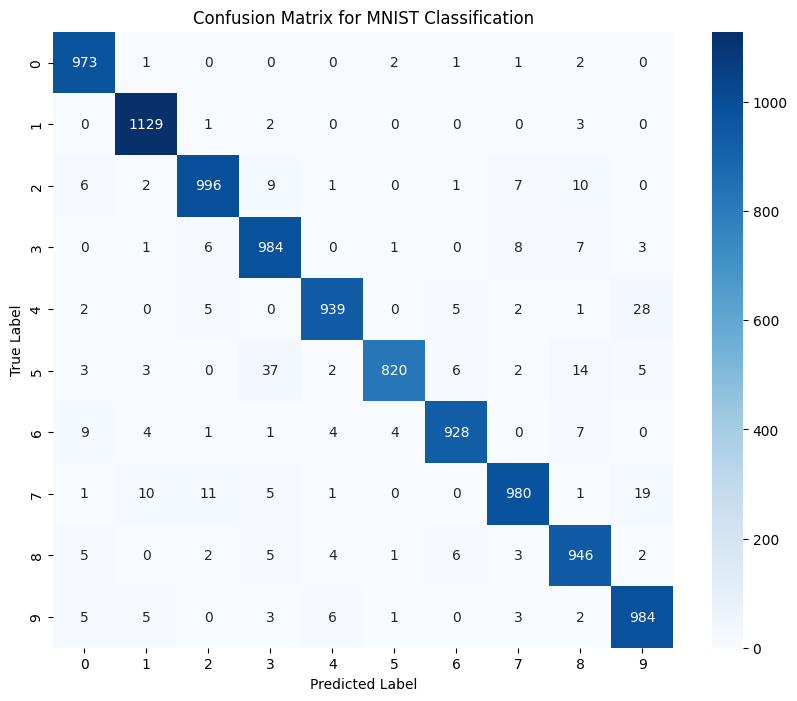

In [25]:
# --- Confusion Matrix Visualization ---

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
test_predictions = model.predict(test_data)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(test_predictions, axis=1)

# Convert true test targets from one-hot encoding back to class labels if necessary
if test_target.ndim > 1 and test_target.shape[1] > 1:
    true_classes = np.argmax(test_target, axis=1)
else:
    true_classes = test_target

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()
